In [346]:
%matplotlib inline
import os
import gc
import random
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import normalize,to_categorical
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array, array_to_img
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("/Users/susovan/Desktop/springboard doc/ship dataset"))



['.DS_Store', 'train', 'test_ApKoW4T.csv', 'sample_submission_ns2btKE.csv']


In [421]:
# the path for loading .jpg images
path = "/Users/susovan/Desktop/springboard doc/ship dataset/train/images"

train_files = pd.read_csv('/Users/susovan/Desktop/springboard doc/ship dataset/train/train.csv', 
                          dtype={'image': 'object', 'category': 'int8'})

test_files = pd.read_csv('/Users/susovan/Desktop/springboard doc/ship dataset/test_ApKoW4T.csv')

In [379]:
train_files.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [349]:
train_files.dtypes

image       object
category      int8
dtype: object

In [350]:
test_files.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [351]:
# display missing categories in train
train_files[train_files.isnull().any(axis=1)]

,image,category


In [352]:
# dictionary ship encoding 
ship = {'Cargo': 1, 
        'Military': 2, 
        'Carrier': 3, 
        'Cruise': 4, 
        'Tankers': 5}

# reverse the ship type dictionary
ship = dict([[v,k] for k,v in ship.items()])
ship

{1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tankers'}

In [431]:
# Create test labels for interpretability
train_files['ship'] = train_files['category'].map(ship).astype('category')
print(train_files)
labels = list(train_files['ship'].unique())
labels

            image  category      ship
0     2823080.jpg         1     Cargo
1     2870024.jpg         1     Cargo
2     2662125.jpg         2  Military
3     2900420.jpg         3   Carrier
4     2804883.jpg         2  Military
...           ...       ...       ...
6247  2881056.jpg         3   Carrier
6248  1145083.jpg         2  Military
6249  2898652.jpg         5   Tankers
6250  2868175.jpg         3   Carrier
6251  2784171.jpg         1     Cargo

[6252 rows x 3 columns]


['Cargo', 'Military', 'Carrier', 'Cruise', 'Tankers']

In [354]:
train_files.dtypes

image         object
category        int8
ship        category
dtype: object

In [239]:
#j = 0
#for i in train_files['image']:
    #im = np.array(Image.open('/Users/susovan/Desktop/springboard doc/ship dataset/train/images/'+i))
    #print(im)
    #j += 1

#inf = train_files['image'].astype(np.float64)
#print(inf)
#print(inf.dtype)


#convert_dict = {'image': float}
#train_files = train_files.astype(convert_dict)
#print(df.dtypes)

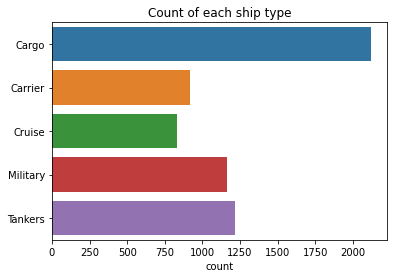

In [355]:
# display count of ship types
plt.title('Count of each ship type')
sns.countplot(y=train_files['ship'].values)
plt.show()


In [356]:
a=train_files['ship'].value_counts(normalize=False)
a

Cargo       2120
Tankers     1217
Military    1167
Carrier      916
Cruise       832
Name: ship, dtype: int64

In [357]:
train_files['ship'].value_counts(normalize=True)

Cargo       0.339091
Tankers     0.194658
Military    0.186660
Carrier     0.146513
Cruise      0.133077
Name: ship, dtype: float64

In [381]:
df_new = train_files.infer_objects()
print(df_new.dtypes)

image       object
category      int8
dtype: object


In [509]:

#train_files['ship']
train_files_onehot = train_files.copy()
train_files_onehot = pd.get_dummies(train_files_onehot, columns=['image'], prefix = ['image'])

#print(train_files_onehot.head())
df = train_files_onehot
df.columns

df = df.drop(['category', 'ship'], axis=1)
print(df.dtypes)
df_float = df.astype(float)
#df['ship_Cargo'].sum()
print(df_float)
print(df_float.dtypes)

image_1001524.jpg    uint8
image_1001804.jpg    uint8
image_1003035.jpg    uint8
image_1004028.jpg    uint8
image_1004054.jpg    uint8
                     ...  
image_977738.jpg     uint8
image_980701.jpg     uint8
image_986137.jpg     uint8
image_994262.jpg     uint8
image_997951.jpg     uint8
Length: 6252, dtype: object
      image_1001524.jpg  image_1001804.jpg  image_1003035.jpg  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
6247                0.0                0.0                0.0   
6248                0.0                0.0                0.0   
6249                0.0                0.0                0.0   
6250                0.0  

In [402]:
#df['target'] = ship_Cargo
#num_0 = len(df[df['ship_Cargo']== 0])
#num_1 = len(df[df['ship_Cargo']== 1])
#print(num_0,num_1)
#undersampled_data = pd.concat([df[df['ship_Cargo']== 0].sample(num_1) , df[df['ship_Cargo']== 1]])
#print(len(undersampled_data))
#undersampled_data  
#undersampled_data.info()

#df['image_1001524.jpg'] = df['image_1001524.jpg'].astype(float)

#df['image_1001524.jpg'].dtype

#df_float = df_float.transpose()
#df_float = df_float.reset_index()
#df_float = df_float.rename(columns = {"index":"image"})
#df_float = df_float['image']
#print(df_float['image'].dtypes)
#df_float.reset_index(drop=True, inplace=True)
#df_float



In [432]:

def load(what='train', target_size=(120,120)):
    array = []
    if what =='train':
        for file in tqdm(train_files['image'].values):
            img = load_img(os.path.join(path, file), target_size=target_size)
            img = img_to_array(img)/255. # normalize image tensor
            array.append(img)
    elif what =='test':
        for file in tqdm(test_files['image'].values):
            img = load_img(os.path.join(path, file), target_size=target_size)
            img = img_to_array(img)/255. # normalize image tensor
            array.append(img)
    gc.collect()
    return np.asarray(array)

In [405]:
# Load Train and Test
train_img = load()
test_img = load('test')
print(f'train dtype: {train_img.dtype}')
print(f'test dtype: {test_img.dtype}')
print(f'train shape: {train_img.shape}')

100%|██████████| 2680/2680 [00:03<00:00, 715.89it/s]


train dtype: float32
test dtype: float32
train shape: (6252, 120, 120, 3)


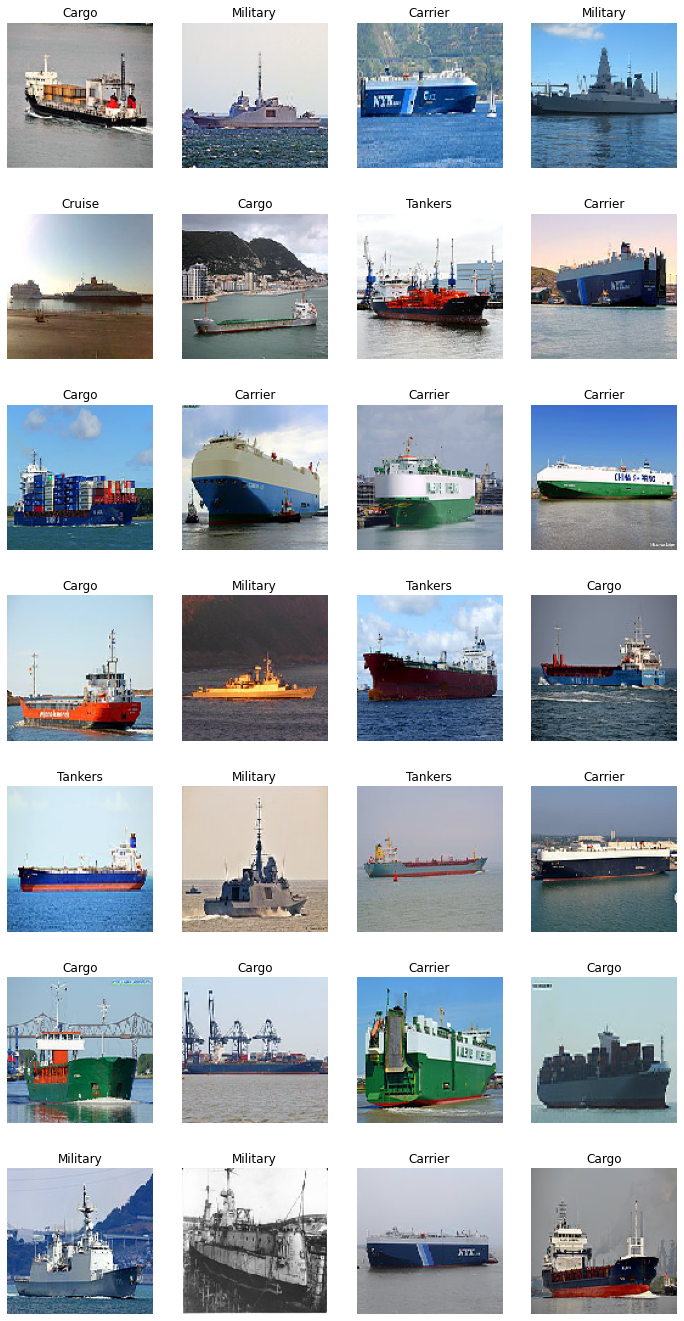

54474

In [406]:
# visualize the top 28 train images
plt.figure(figsize=(12,24))

for i in range(1,29):
    plt.subplot(7,4,i)
    plt.title(f'{train_files["ship"].values[i]}')
    plt.imshow(train_img[i])
    plt.axis('off')
plt.show()
gc.collect()

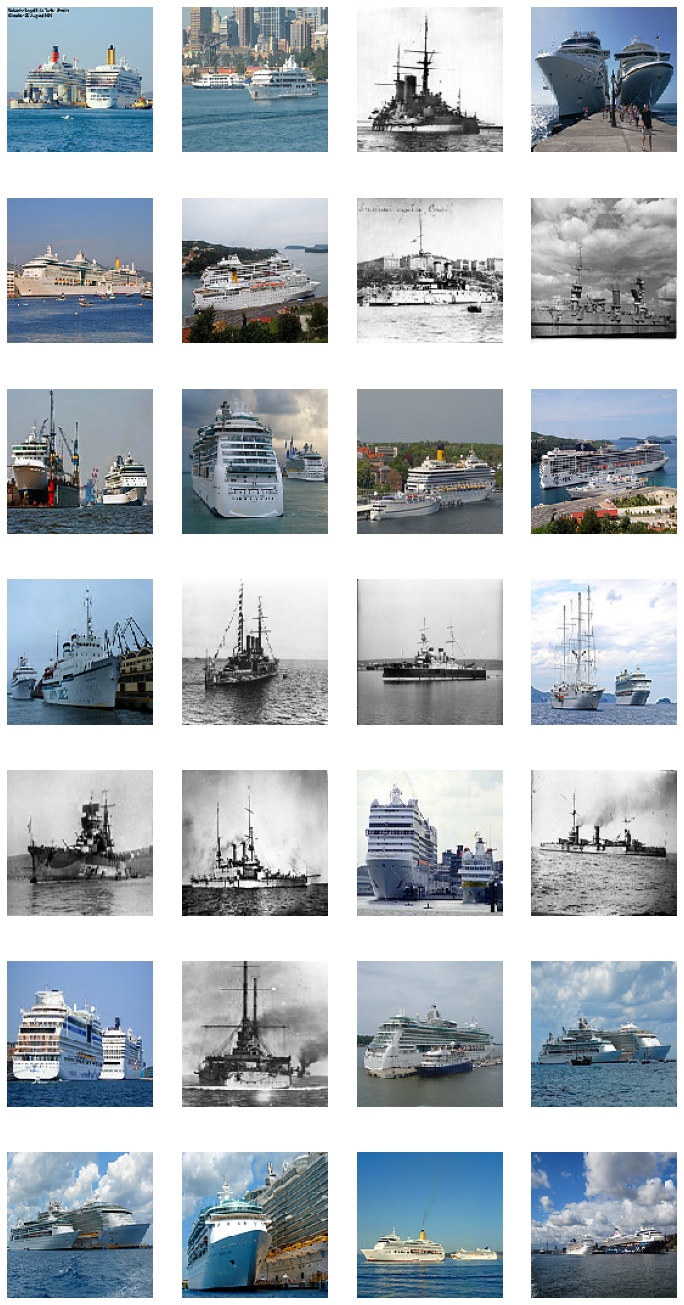

54464

In [407]:
# visualize the top 28 test images
plt.figure(figsize=(12,24))

for i in range(1,29):
    plt.subplot(7,4,i)
    plt.imshow(test_img[i])
    plt.axis('off')
plt.show()
del test_img # free up space for training
gc.collect()

In [510]:
train_files_onehot = train_files.copy()
train_files_onehot = pd.get_dummies(train_files_onehot, columns=['image'], prefix = ['image'])

#print(train_files_onehot.head())
df = train_files_onehot
df.columns

df = df.drop(['category', 'ship'], axis=1)
print(df.dtypes)
df_float = df.astype(float)
#df['ship_Cargo'].sum()
print(df_float)
print(df_float.dtypes)

image_1001524.jpg    uint8
image_1001804.jpg    uint8
image_1003035.jpg    uint8
image_1004028.jpg    uint8
image_1004054.jpg    uint8
                     ...  
image_977738.jpg     uint8
image_980701.jpg     uint8
image_986137.jpg     uint8
image_994262.jpg     uint8
image_997951.jpg     uint8
Length: 6252, dtype: object
      image_1001524.jpg  image_1001804.jpg  image_1003035.jpg  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
6247                0.0                0.0                0.0   
6248                0.0                0.0                0.0   
6249                0.0                0.0                0.0   
6250                0.0  

In [512]:
X = df_float
y = train_files['category']
print(y.dtype)


int8


In [513]:
ohe = OneHotEncoder(dtype='int8', sparse=False)
y = ohe.fit_transform(train_files['category'].values.reshape(-1,1))
y.dtype
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int8)

In [514]:
#from imblearn.over_sampling import SMOTE

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)
from imblearn.over_sampling import SMOTE
smote = SMOTE("minority")
X_sm, y_sm = smote.fit_sample(X, y)

In [515]:
print(X_sm.shape)
print(y_sm.shape)
X_sm

(7540, 6252)
(7540, 5)


,image_1001524.jpg,image_1001804.jpg,image_1003035.jpg,image_1004028.jpg,image_1004054.jpg,image_1005343.jpg,image_1008439.jpg,image_1010906.jpg,image_1011813.jpg,image_1013663.jpg,...,image_953486.jpg,image_954663.jpg,image_961864.jpg,image_964374.jpg,image_967394.jpg,image_977738.jpg,image_980701.jpg,image_986137.jpg,image_994262.jpg,image_997951.jpg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [516]:
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7540 entries, 0 to 7539
Columns: 6252 entries, image_1001524.jpg to image_997951.jpg
dtypes: float64(6252)
memory usage: 359.7 MB


In [529]:

Xd = pd.get_dummies(X_sm).idxmax(1)


Xd

0       image_2823080.jpg
1       image_2870024.jpg
2       image_2662125.jpg
3       image_2900420.jpg
4       image_2804883.jpg
              ...        
7535    image_2655233.jpg
7536    image_2494294.jpg
7537     image_663359.jpg
7538    image_2398928.jpg
7539     image_586786.jpg
Length: 7540, dtype: object

In [462]:
#y = to_categorical(y)
#y.dtype
#y

In [565]:
X_train,X_test,y_train,y_test = train_test_split(X_sm, y_sm , test_size=0.2, random_state=20)


In [566]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(X_train.dtype)
print(y_train.dtype)
X_train = X_train / 255.0
X_test = X_test / 255.0

(6032, 6252)
(6032, 5)
(1508, 6252)
(1508, 5)
int64


In [567]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [568]:
#Data augmentation

train_datagen = ImageDataGenerator(rotation_range=45, 
                             horizontal_flip=True, 
                             width_shift_range=0.2,
                             zoom_range=0.2)
                              
                             


train_generator = train_datagen.flow(
                   X_train,
                   y_train,
                   batch_size=32)



ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (6032, 6252))

In [574]:

activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'VALID', input_shape = (120,120,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'VALID', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'VALID', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'VALID', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())



model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 118, 118, 32)      128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 116, 116, 32)      9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 116, 116, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_24 (Batc (None, 56, 56, 64)       

In [575]:
np.random.seed(20)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 6252]


In [545]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch = 1000,
                epochs = 50,
                validation_data = (X_test, y_test))

ValueError: Asked to retrieve element 0, but the Sequence has length 0